# PART-1

# EDA & Data Preprocessing on Google App Store Rating Dataset.

# Q1)Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
app=pd.read_csv("Apps_data+(1).csv")
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Q2)Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
app.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
app.shape

(10841, 13)

# Q3)Check summary statistics of the dataset. List out the columns that need to be worked upon for modelbuilding.


In [8]:
app.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
app.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
columns_for_model_build = ['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']
columns_for_model_build

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres']

# Q4)Check if there are any duplicate records in the dataset? if any drop them.

In [11]:
app1=app.copy()

In [12]:
app1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
duplicate_rows = app1[app.duplicated()]
duplicate_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [14]:
app1.drop_duplicates(inplace=True)

In [15]:
app1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
app1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
app.shape

(10841, 13)

In [18]:
app1.shape

(10358, 13)

In [19]:
app.shape[0]-app1.shape[0]

483

# Q5)Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [20]:
app1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [21]:
len(app1['Category'].unique())

34

In [22]:
invalid_category = app1[app1['Category'] == '1.9'].index
invalid_category

Int64Index([10472], dtype='int64')

In [40]:
app1.drop(index=invalid_category,inplace=True)

In [41]:
app1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [42]:
app1.shape

(10357, 13)

# Q6)Check if there are missing values present in the column Rating, If any? drop them and and create a newcolumn as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [43]:
app2 = app1.copy()
app2.shape

(10357, 13)

In [44]:
missing_value = app2['Rating'].isnull().sum()#count()
missing_value

1465

In [45]:
app2.dropna(subset=['Rating'], inplace=True)

In [46]:
app2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [47]:
app2['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [48]:
app2['Rating_category'] = app2['Rating'].apply(lambda x : 'High'if x > 3.5 else 'Low')

In [49]:
app2['Rating_category'].unique()

array(['High', 'Low'], dtype=object)

In [50]:
app2.shape

(8892, 14)

# Q7)Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [51]:
app3=app2.copy()

In [52]:
app3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


In [53]:
len(app3[app3['Rating_category'] == 'High'])

8012

In [54]:
len(app3[app3['Rating_category'] == 'Low'])

880

# comment on distribution

In [55]:
# 1. the above code I can comment that the count of 'High' in column 'Rating_category' is more  compared to the count of 'Low' and  the distirbution is more for the value 'High'. 
# 2. Therefore, I can conclude that most of the apps have High ratings.

# Q8)Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [56]:
app3.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

In [57]:
app3['Reviews']=app3['Reviews'].astype(int)

In [58]:
app3['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int32

In [59]:
app3.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

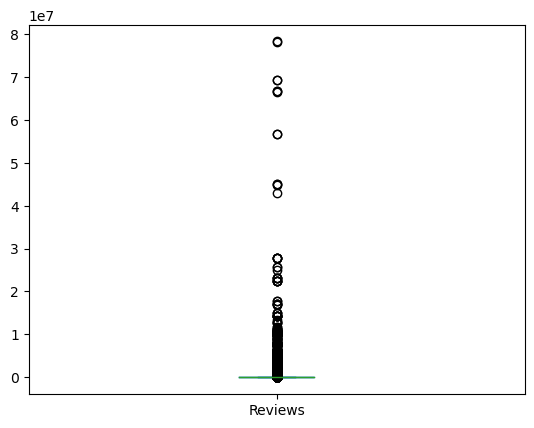

In [60]:
app3['Reviews'].plot.box()
plt.show()

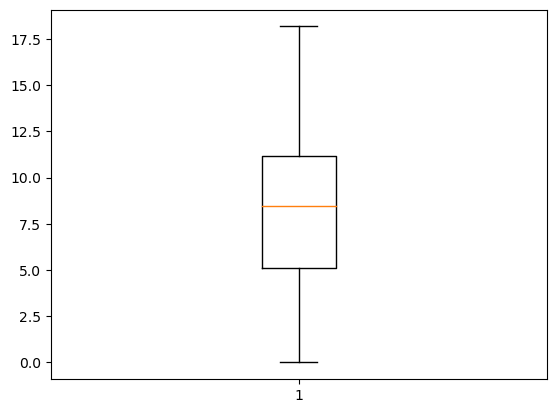

In [61]:
app3['Reviews_log'] = np.log(app3['Reviews'])
plt.boxplot(app3['Reviews_log'])
plt.show()

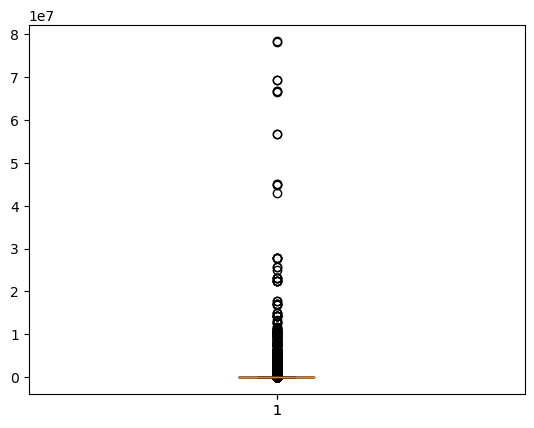

In [62]:
r = plt.boxplot(app3['Reviews'])
rl = plt.boxplot(app3['Reviews_log'])
plt.show(rl,r)

# Q9) The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [63]:
app4=app3.copy()


In [64]:
len(app4[app4['Size'] == 'Varies with device'])

1468

In [65]:
app4.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
Reviews_log        float64
dtype: object

In [66]:
app4["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [67]:
# 1.dropping rows which contains the value'Varies with device'
    
app4.drop(app4[app4['Size'] == 'Varies with device'].index,inplace=True)

In [73]:
# 2. Replacing 'M' with 1 million and 'k' with 1 Thousand



app4['Size'] = (app4['Size'].str[0:-1].astype(float)) * (app4['Size'].str[-1].apply(lambda x:1000000 if x=="M" else 1000))

In [74]:
app4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High,3.784190
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High,1.386294


In [75]:
app4['Size'] = app4['Size'].astype(float)
print(app4.dtypes)
app4

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
Reviews_log        float64
dtype: object


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High,3.784190
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High,1.386294


In [76]:
app4['Size'] = app4['Size'].astype(int)

In [77]:
app4['Size']

0        19000000
1        14000000
2         8700000
3        25000000
4         2800000
           ...   
10833      619000
10834     2600000
10836    53000000
10837     3600000
10840    19000000
Name: Size, Length: 7424, dtype: int32

# Q10)Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [78]:
len(app4['Installs'].unique())

19

In [79]:
app4['Installs'] = app4['Installs'].map(lambda x: x.rstrip('+'))
app4['Installs'] = app4['Installs'].map(lambda x: ''.join(x.split(',')))
app4['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: object

In [80]:
app4.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size                 int32
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
Reviews_log        float64
dtype: object

# Q11)Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [81]:
app4[app4['Price'] == '$6.99']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
477,Calculator,DATING,2.6,57,6200000,1000,Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,Low,4.043051
1837,Call of Duty:Black Ops Zombies,GAME,4.2,13004,46000000,100000,Paid,$6.99,Teen,Action,"December 20, 2016",1.0.11,2.3.3 and up,High,9.473012
4437,Prime Key for Nougat Launcher& O Launcher &KitKat,PERSONALIZATION,4.1,324,313000,5000,Paid,$6.99,Everyone,Personalization,"August 20, 2017",5.1,5.1 and up,High,5.780744
6534,New York Mysteries (Full),GAME,4.5,514,5900000,5000,Paid,$6.99,Teen,Adventure,"June 4, 2018",1.0.36,4.0 and up,High,6.242223
6538,The Legacy (Full),GAME,4.6,144,6300000,1000,Paid,$6.99,Everyone,Adventure,"May 15, 2018",1.0.9,4.0 and up,High,4.969813
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26000000,1000000,Paid,$6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,High,12.762718
7899,Radiological Anatomy For FRCR1,MEDICAL,4.8,12,44000000,100,Paid,$6.99,Everyone,Medical,"January 22, 2014",1.3,4.0 and up,High,2.484907
9647,The EO Bar,HEALTH_AND_FITNESS,4.7,416,34000000,10000,Paid,$6.99,Everyone,Health & Fitness,"July 2, 2018",1.3.7,4.1 and up,High,6.030685
10583,Florida Tides & Weather,WEATHER,3.8,30,2000000,1000,Paid,$6.99,Everyone,Weather,"May 6, 2015",2.0.0,2.3 and up,High,3.401197


In [82]:
app4['Price'] = app4['Price'].apply(lambda x : x.lstrip('$').rstrip('')).astype(float)

In [83]:
app4['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [84]:
app4['Price'].dtype

dtype('float64')

# Q12)Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [85]:
app5 = app4.copy()

In [86]:
app5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High,3.784190
10834,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High,1.386294


In [87]:
app5.drop(['Rating','App','Genres','Last Updated',
'Current Ver','Android Ver','Reviews_log'],axis=1,inplace=True)

In [88]:
app5.shape

(7424, 8)

# Q13)Encode the categorical columns.

In [89]:
encoded = LabelEncoder()
for col in app5.columns:
    if app5[col].dtype=='object':
        app5[col]=encoded.fit_transform(app5[col])

In [90]:
# # one-hot-encode using sklearn
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# encoded_results = encoder.fit_transform(app_df).toarray()

In [91]:
app5

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,159,19000000,4,0,0.0,1,0
1,0,967,14000000,15,0,0.0,1,0
2,0,87510,8700000,16,0,0.0,1,0
3,0,215644,25000000,17,0,0.0,4,0
4,0,967,2800000,5,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10833,3,44,619000,3,0,0.0,1,0
10834,11,7,2600000,12,0,0.0,1,0
10836,11,38,53000000,13,0,0.0,1,0
10837,11,4,3600000,2,0,0.0,1,0


In [92]:
app5.describe()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
count,7424.000000,7.424000e+03,7.424000e+03,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000
mean,16.585399,2.787740e+05,2.274762e+07,7.829741,0.073680,1.116599,1.466191,0.111126
std,8.139957,1.743621e+06,2.343479e+07,4.627944,0.261267,17.708566,1.006480,0.314309
min,0.000000,1.000000e+00,8.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,9.900000e+01,5.100000e+06,4.000000,0.000000,0.000000,1.000000,0.000000
50%,14.000000,2.067000e+03,1.400000e+07,6.000000,0.000000,0.000000,1.000000,0.000000
75%,24.000000,3.689475e+04,3.300000e+07,13.000000,0.000000,0.000000,1.000000,0.000000
max,32.000000,4.489389e+07,1.000000e+08,18.000000,1.000000,400.000000,5.000000,1.000000


# Q14)Segregate the target and independent features (Hint: Use Rating_category as the target)


In [93]:
# Segregating the target and independent variables
target_variable = app5['Rating_category']
independent_varibles = app5.loc[:, app5.columns != 'Rating_category'] #app5['Rating_category']#('Category','Reviews','Size','Installs','Type','Price','Content Rating')

In [94]:
target_variable.head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    0
22    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
38    0
39    0
40    0
41    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
53    0
Name: Rating_category, dtype: int32

In [95]:
independent_varibles

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,159,19000000,4,0,0.0,1
1,0,967,14000000,15,0,0.0,1
2,0,87510,8700000,16,0,0.0,1
3,0,215644,25000000,17,0,0.0,4
4,0,967,2800000,5,0,0.0,1
...,...,...,...,...,...,...,...
10833,3,44,619000,3,0,0.0,1
10834,11,7,2600000,12,0,0.0,1
10836,11,38,53000000,13,0,0.0,1
10837,11,4,3600000,2,0,0.0,1


In [96]:
app5['Rating_category'].unique()

array([0, 1])

In [97]:
app5.corr()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
Category,1.000000,-0.017677,-0.152245,0.006619,0.025515,-0.014596,-0.113560,0.031806
Reviews,-0.017677,1.000000,0.240104,0.083322,-0.043962,-0.010010,0.043765,-0.055520
Size,-0.152245,0.240104,1.000000,0.108973,-0.026503,-0.026820,0.200772,-0.095114
Installs,0.006619,0.083322,0.108973,1.000000,-0.107279,-0.024911,0.063000,-0.055433
Type,0.025515,-0.043962,-0.026503,-0.107279,1.000000,0.223588,-0.034840,-0.002930
Price,-0.014596,-0.010010,-0.026820,-0.024911,0.223588,1.000000,-0.012819,0.004051
Content Rating,-0.113560,0.043765,0.200772,0.063000,-0.034840,-0.012819,1.000000,-0.047954
Rating_category,0.031806,-0.055520,-0.095114,-0.055433,-0.002930,0.004051,-0.047954,1.000000


# Q15)Split the dataset into train and test.


In [98]:
# Split the dataset into train and test
X =  app5.loc[:, app5.columns != 'Rating_category']
y = app5['Rating_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
9375,28,35746,55000000,16,0,0.0,1
3025,28,36255,25000000,6,0,0.0,1
7549,23,3989,1100000,5,0,0.0,1
6782,6,20829,1900000,16,0,0.0,1
1709,14,5418675,96000000,8,0,0.0,1
...,...,...,...,...,...,...,...
7754,28,17,1500000,11,0,0.0,1
7795,11,2420,6700000,14,0,0.0,4
7988,11,16391,13000000,15,0,0.0,4
1446,16,417907,34000000,7,0,0.0,1


In [100]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
1867,14,224514,81000000,16,0,0.0,4
4414,14,80,7600000,4,0,0.0,1
116,2,74,2900000,4,0,0.0,1
7608,11,39153,98000000,6,0,0.0,1
9463,11,48731,68000000,16,0,0.0,1
...,...,...,...,...,...,...,...
701,8,2544,18000000,5,0,0.0,1
1245,13,7690,25000000,5,0,0.0,1
4228,29,8137,3900000,6,0,0.0,1
5766,14,1604146,57000000,7,0,0.0,4


In [101]:
y_train

9375     0
3025     0
7549     0
6782     0
1709     0
        ..
7754     0
7795     0
7988     0
1446     0
10599    0
Name: Rating_category, Length: 5939, dtype: int32

In [102]:
y_test

1867     0
4414     0
116      0
7608     0
9463     0
        ..
701      0
1245     0
4228     0
5766     0
10166    0
Name: Rating_category, Length: 1485, dtype: int32

# Q16)Standardize the data, so that the values are within a particular range.


In [103]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the dataframe
app5_scaled = scaler.fit_transform(app5)

In [104]:
app5_scaled

array([[-2.03766618, -0.15980174, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.15933831, -0.37330014, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.10970091, -0.59947486, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -0.15987115,  1.29100439, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -0.15989065, -0.81711468, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  0.06855908, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018]])